# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	信贷人是否有逾期90天或者更糟糕情况(越小越差) 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	信贷总余额除以信贷限额的总和(越小越差) 	|	percentage|
|age	|	借贷人的年龄	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	逾期30-59天的次数(越大越差) |	integer|
|DebtRatio	|	过月能偿还债务的比例(越小越差) 	|	percentage|
|MonthlyIncome	|	月收入(越小越差) 	|	real|
|NumberOfOpenCreditLinesAndLoans	|	公开贷款数量(越大越差) |	integer|
|NumberOfTimes90DaysLate	|	逾期90天或以上的次数(越大越差)	|	integer|
|NumberRealEstateLoansOrLines	|	抵押贷款和房地产贷款数量(越大越差)	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	逾期60-89天的次数(越大越差) |integer|
|NumberOfDependents	|	家中受抚养人的数目(越大越差)	|	integer|


----------
## Read the data into Pandas 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
data.shape

(112915, 11)

------------
## Drop NaN

In [3]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
data.dropna(inplace=True)
data.shape

(108648, 11)

In [5]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,108648.000000,108648.000000,108648.000000,108648.000000,108648.000000,1.086480e+05,108648.000000,108648.000000,108648.000000,108648.000000,108648.000000
mean,0.067429,5.989695,51.361304,0.378636,0.306237,6.964368e+03,8.679055,0.213488,1.015325,0.188664,0.856574
std,0.250764,259.792416,14.453571,3.525280,0.222924,1.492419e+04,5.128120,3.493366,1.077678,3.476195,1.149537
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034319,41.000000,0.000000,0.133493,3.640000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.172905,51.000000,0.000000,0.278311,5.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.570881,62.000000,0.000000,0.440113,8.416000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,0.999909,3.008750e+06,57.000000,98.000000,29.000000,98.000000,20.000000


In [6]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

---------
## Create X and y

In [7]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

In [9]:
# 把数据切分成70%的训练集，30%的测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 查看训练集跟测试集的维度---原来数据集的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape

((76053, 10), (32595, 10), (76053,), (32595,), (108648, 10))

In [10]:
# 对特征进行标准化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # 对数据的每一列进行归一化

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [11]:
# 检查标准化后的数据
np.mean(X_train_std, axis=0), np.std(X_train_std, axis=0), np.mean(X_test_std, axis=0), np.std(X_test_std, axis=0)

(array([-3.73709248e-18, -2.42350447e-16,  2.25159822e-17, -2.42537302e-16,
         2.57392244e-17,  2.70939205e-17,  1.08842818e-17, -3.19521407e-17,
        -8.40845808e-18,  1.21455506e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([-5.23179189e-18, -1.87472543e-16,  1.35154624e-17, -1.87799530e-16,
        -1.38424494e-17, -1.30794797e-17, -3.48786126e-18,  9.48262280e-17,
        -1.99462066e-17,  2.26710982e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

In [12]:
from sklearn.linear_model import LogisticRegression

# 初始化模型--->训练
lr = LogisticRegression(C=1000.0,
                        random_state=0, max_iter=100,
                        penalty='l2', solver='lbfgs') # solver='lbfgs'(default)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, random_state=0)

### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

In [13]:
# 决策树方法的输入数据不需要进行标准化
from sklearn.tree import DecisionTreeClassifier

# 初始化模型 --->训练
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

In [14]:
from sklearn.ensemble import RandomForestClassifier

# 初始化模型 --->训练
forest = RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, n_jobs=2,
                       random_state=1)

### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

In [58]:
from sklearn.svm import SVC

# 初始化模型 ---> 训练
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0)
svm.fit(X_train_std, y_train)

SVC(gamma=0.1, random_state=0)

### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# 初始化模型 ---> 训练
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

---

## 练习3：在测试集上进行预测，计算准确度

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [17]:
from sklearn.metrics import accuracy_score

# lr.predict_proba(X_test_std)
# 预测 ---> 检验
y_lr_train_pred = lr.predict(X_train_std)
y_lr_test_pred = lr.predict(X_test_std)

print('Misclassified number: %d' % (y_test != y_lr_test_pred).sum()) # 模型测试时预测错误的样本数
print('Test accuracy: %0.4f' % accuracy_score(y_test, y_lr_test_pred)) # 模型对测试集预测的正确率
print('Train accuracy: %0.4f' % accuracy_score(y_train, y_lr_train_pred)) # 模型对测试集预测的正确率

Misclassified number: 2156
Test accuracy: 0.9339
Train accuracy: 0.9331


### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [18]:
# 预测 ---> 检验
y_tree_train_pred = tree.predict(X_train)
y_tree_test_pred = tree.predict(X_test)

print('Misclassified number: %d' % (y_test != y_tree_test_pred).sum()) # 模型测试时预测错误的样本数
print('Test accuracy: %0.4f' % accuracy_score(y_test, y_tree_test_pred)) # 模型对测试集预测的正确率
print('Train accuracy: %0.4f' % accuracy_score(y_train, y_tree_train_pred)) # 模型对测试集预测的正确率

Misclassified number: 2101
Test accuracy: 0.9355
Train accuracy: 0.9353


### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [19]:
# 预测 ---> 检验
y_forest_train_pred = forest.predict(X_train)
y_forest_test_pred = forest.predict(X_test)

print('Misclassified number: %d' % (y_test != y_forest_test_pred).sum()) # 模型测试时预测错误的样本数
print('Test accuracy: %0.4f' % accuracy_score(y_test, y_forest_test_pred)) # 模型对测试集预测的正确率
print('Train accuracy: %0.4f' % accuracy_score(y_train, y_forest_train_pred)) # 模型对测试集预测的正确率

Misclassified number: 2206
Test accuracy: 0.9323
Train accuracy: 0.9946


### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [61]:
# 预测 ---> 检验
y_svm_train_pred = svm.predict(X_train_std)
y_svm_test_pred = svm.predict(X_test_std)

print('Misclassified number: %d' % (y_test != y_svm_test_pred).sum()) # 模型测试时预测错误的样本数
print('Test accuracy: %0.4f' % accuracy_score(y_test, y_svm_test_pred)) # 模型对测试集预测的正确率
print('Train accuracy: %0.4f' % accuracy_score(y_train, y_svm_train_pred)) # 模型对测试集预测的正确率

Misclassified number: 2119
Test accuracy: 0.9350
Train accuracy: 0.9343


### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [20]:
# 预测 ---> 检验
y_knn_train_pred = knn.predict(X_train)
y_knn_test_pred = knn.predict(X_test)

print('Misclassified number: %d' % (y_test != y_knn_test_pred).sum()) # 模型测试时预测错误的样本数
print('Test accuracy: %0.4f' % accuracy_score(y_test, y_knn_test_pred)) # 模型对测试集预测的正确率
print('Train accuracy: %0.4f' % accuracy_score(y_train, y_knn_train_pred)) # 模型对测试集预测的正确率

Misclassified number: 2213
Test accuracy: 0.9321
Train accuracy: 0.9351


---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

[[30197   227]
 [ 1874   297]]
TP: 297
TN: 30197
FP: 227
FN: 1874


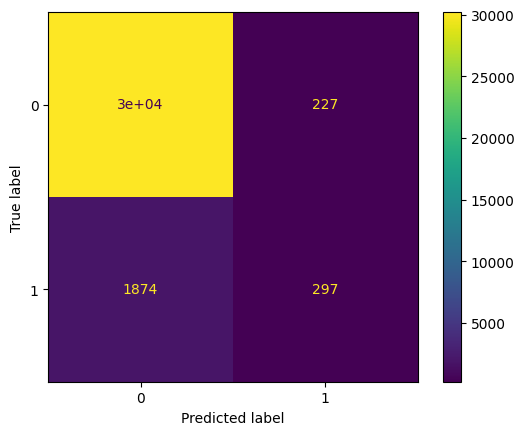

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 决策树模型预测结果的混淆矩阵
print(confusion_matrix(y_test, y_tree_test_pred)) # 第一个参数时真实值，第二个参数是预测值
ConfMatrix_tree = confusion_matrix(y_test, y_tree_test_pred, labels=tree.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=ConfMatrix_tree, display_labels=tree.classes_)
TP_tree = ConfMatrix_tree[1, 1]
TN_tree = ConfMatrix_tree[0, 0]
FP_tree = ConfMatrix_tree[0, 1]
FN_tree = ConfMatrix_tree[1, 0]
print("TP:", TP_tree)
print("TN:", TN_tree)
print("FP:", FP_tree)
print("FN:", FN_tree)

disp_tree.plot() 
plt.show()

- 混淆矩阵

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 回归模型预测结果的混淆矩阵
ConfMatrix_lr = confusion_matrix(y_test, y_lr_test_pred) # 第一个参数时真实值，第二个参数是预测值
TP_lr = ConfMatrix_lr[1, 1]
TN_lr = ConfMatrix_lr[0, 0]
FP_lr = ConfMatrix_lr[0, 1]
FN_lr = ConfMatrix_lr[1, 0]

# 决策树模型预测结果的混淆矩阵
ConfMatrix_tree = confusion_matrix(y_test, y_tree_test_pred, labels=tree.classes_)
TP_tree = ConfMatrix_tree[1, 1]
TN_tree = ConfMatrix_tree[0, 0]
FP_tree = ConfMatrix_tree[0, 1]
FN_tree = ConfMatrix_tree[1, 0]


# 随机森林模型预测结果的混淆矩阵
ConfMatrix_forest = confusion_matrix(y_test, y_forest_test_pred)
TP_forest = ConfMatrix_forest[1, 1]
TN_forest = ConfMatrix_forest[0, 0]
FP_forest = ConfMatrix_forest[0, 1]
FN_forest = ConfMatrix_forest[1, 0]

# SVM模型预测结果的混淆矩阵
ConfMatrix_svm = confusion_matrix(y_test, y_svm_test_pred)
TP_svm = ConfMatrix_svm[1, 1]
TN_svm = ConfMatrix_svm[0, 0]
FP_svm = ConfMatrix_svm[0, 1]
FN_svm = ConfMatrix_svm[1, 0]

# KNN模型预测结果的混淆矩阵
ConfMatrix_knn = confusion_matrix(y_test, y_knn_test_pred)
TP_knn = ConfMatrix_knn[1, 1]
TN_knn = ConfMatrix_knn[0, 0]
FP_knn = ConfMatrix_knn[0, 1]
FN_knn = ConfMatrix_knn[1, 0]

ConfMatrix = pd.DataFrame({
    'TP': [TP_lr, TP_tree, TP_forest, TP_svm, TP_knn],
    'TN': [TN_lr, TN_tree, TN_forest, TN_svm, TN_knn],
    'FP': [FP_lr, FP_tree, FP_forest, FP_svm, FP_knn],
    'FN': [FN_lr, FN_tree, FN_forest, FN_svm, FN_knn],
    'models': ['LogisticRegression', 'DecisionTree', 'RandomForest', 'SVM', 'KNeighbors']
})
ConfMatrix.set_index('models', inplace=True)
print(ConfMatrix)

                     TP     TN   FP    FN
models                                   
LogisticRegression  101  30338   86  2070
DecisionTree        297  30197  227  1874
RandomForest        406  29983  441  1765
SVM                 108  30368   56  2063
KNeighbors           31  30351   73  2140


- **识别率**

In [63]:
# 识别率：分类器正确分类的比例
CA_lr = (TP_lr + TN_lr)/ float(TP_lr + TN_lr + FN_lr + FP_lr)
CA_tree = (TP_tree + TN_tree)/ float(TP_tree + TN_tree + FN_tree + FP_tree)
CA_forest = (TP_forest + TN_forest)/ float(TP_forest + TN_forest + FN_forest + FP_forest)
CA_svm = (TP_svm + TN_svm)/ float(TP_svm + TN_svm + FN_svm + FP_svm)
CA_knn =(TP_knn + TN_knn)/ float(TP_knn + TN_knn + FN_knn + FP_knn)
ConfMatrix['Classification Accuracy'] = [CA_lr, CA_tree, CA_forest, CA_svm, CA_knn]

- **误分率**

In [64]:
# 误分率：分类器误分的比例
CE_lr = (FP_lr + FN_lr)/ float(TP_lr + TN_lr + FN_lr + FP_lr)
CE_tree = (FP_tree + FN_tree)/ float(TP_tree + TN_tree + FN_tree + FP_tree)
CE_forest = (FP_forest + FN_forest)/ float(TP_forest + TN_forest + FN_forest + FP_forest)
CE_svm = (FP_svm + FN_svm)/ float(TP_svm + TN_svm + FN_svm + FP_svm)
CE_knn = (FP_knn + FN_knn)/ float(TP_knn + TN_knn + FN_knn + FP_knn)
ConfMatrix['Classification Error'] = [CE_lr, CE_tree, CE_forest, CE_svm, CE_knn]

- **灵敏性（召回率，真正例识别率）**

In [65]:
# 正确识别的正例数据在实际正例数据中的百分比
Sensi_lr = TP_lr / float(TP_lr + FN_lr)
Sensi_tree = TP_tree / float(TP_tree + FN_tree)
Sensi_forest = TP_forest / float(TP_forest + FN_forest)
Sensi_svm = TP_svm / float(TP_svm + FN_svm)
Sensi_knn = TP_knn / float(TP_knn + FN_knn)
ConfMatrix['Sensitivity'] = [Sensi_lr, Sensi_tree, Sensi_forest, Sensi_svm, Sensi_knn]

- **特效性（真负率）**

In [66]:
# 正确识别的负例数据在实际负例数据中的百分比
Spec_lr = TN_lr / float(TN_lr + FP_lr)
Spec_tree = TN_tree / float(TN_tree + FP_tree)
Spec_forest = TN_forest / float(TN_forest + FP_forest)
Spec_svm = TN_svm / float(TN_svm + FP_svm)
Spec_knn = TN_knn / float(TN_knn + FP_knn)
ConfMatrix['Specificity'] = [Spec_lr, Spec_tree, Spec_forest, Spec_svm, Spec_knn]

- **假阳率** 

In [69]:
# 实际值是负例数据，预测错误的百分比
FPR_lr = FP_lr / float(TN_lr + FP_lr)
FPR_tree = FP_tree / float(TN_tree + FP_tree)
FPR_forest = FP_forest / float(TN_forest + FP_forest)
FPR_svm = FP_svm / float(TN_svm + FP_svm)
FPR_knn = FP_knn / float(TN_knn + FP_knn)
ConfMatrix['False Positive Rate'] = [FPR_lr, FPR_tree, FPR_forest, FPR_svm, FPR_knn]

- **精度** 

In [70]:
# 标记为正类的数据实际为正例的百分比
Precisi_lr = TP_lr / float(TP_lr + FP_lr)
Precisi_tree = TP_tree / float(TP_tree + FP_tree)
Precisi_forest = TP_forest / float(TP_forest + FP_forest)
Precisi_svm = TP_svm / float(TP_svm + FP_svm)
Precisi_knn = TP_knn / float(TP_knn + FP_knn)
ConfMatrix['Precision'] = [Precisi_lr, Precisi_tree, Precisi_forest, Precisi_svm, Precisi_knn]

In [71]:
ConfMatrix

,TP,TN,FP,FN,Classification Accuracy,Classification Error,Sensitivity,Specificity,False Positive Rate,Precision
models,,,,,,,,,,
LogisticRegression,101,30338,86,2070,0.933855,0.066145,0.046522,0.997173,0.002827,0.540107
DecisionTree,297,30197,227,1874,0.935542,0.064458,0.136803,0.992539,0.007461,0.566794
RandomForest,406,29983,441,1765,0.932321,0.067679,0.187011,0.985505,0.014495,0.479339
SVM,108,30368,56,2063,0.934990,0.065010,0.049747,0.998159,0.001841,0.658537
KNeighbors,31,30351,73,2140,0.932106,0.067894,0.014279,0.997601,0.002399,0.298077


## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

[0.03179916 0.02317313 0.05187976 ... 0.0384442  0.05778047 0.10491982]


Text(0, 0.5, 'Frequency')

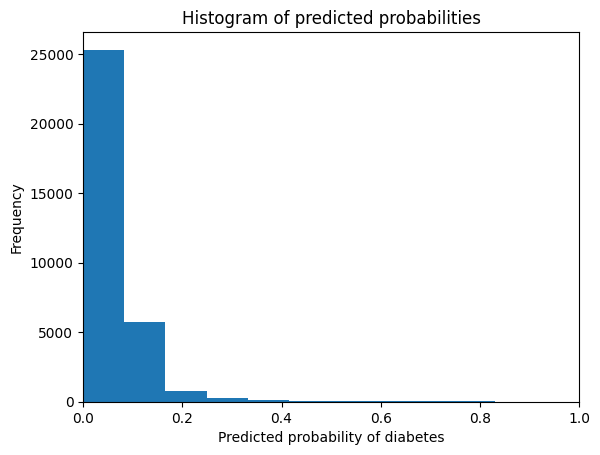

In [75]:
# store the predicted probabilities for class 1
y_lr_pred_prob = lr.predict_proba(X_test_std)[:, 1] # predict_proba() 返回值有两列，第一列是预测值为0的概率，第二列是预测值为1的概率（行为不同的样本）
print(y_lr_pred_prob)

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_lr_pred_prob, bins=12)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

[0. 0. 0. ... 0. 0. 0.]


Text(0, 0.5, 'Frequency')

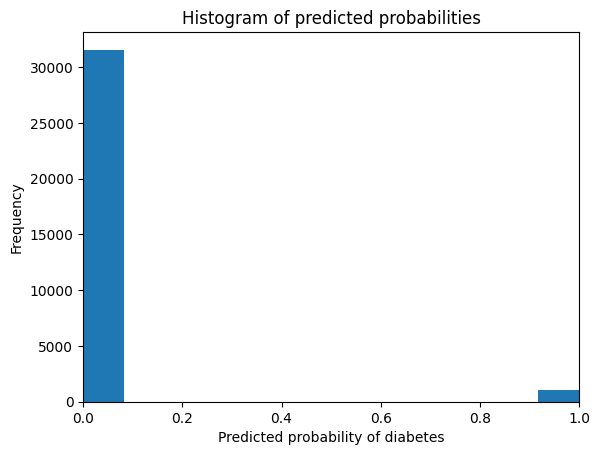

In [78]:
# predict diabetes if the predicted probability is greater than 0.2
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_lr_pred_prob.reshape(-1, 1), threshold=0.2)[:,0]
print(y_pred_class)

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_pred_class, bins=12)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [80]:
# 前后的灵敏度

ConfMatrix_lr = confusion_matrix(y_test, y_pred_class) 
TP_lr_prod = ConfMatrix_lr[1, 1]
TN_lr_prod = ConfMatrix_lr[0, 0]
FP_lr_prod = ConfMatrix_lr[0, 1]
FN_lr_prod = ConfMatrix_lr[1, 0]
Sensi_lr_prod = TP_lr_prod / float(TP_lr_prod + FN_lr_prod)
Sensi_lr = TP_lr / float(TP_lr + FN_lr)

print('修改阈值前：%0.8f' % Sensi_lr)
print('修改阈值后：%0.8f' % Sensi_lr_prod)

修改阈值前：0.04652234
修改阈值后：0.19207738
